In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Enrollment_Month': ['January', 'February', 'January', 'March', 'February', 
                         'March', 'January', 'February', 'March', 'January'],
    'School': ['High School A', 'High School B', 'High School A', 'High School C', 
               'High School B', 'High School C', 'High School A', 'High School B', 
               'High School C', 'High School A'],
    'Module1_Score': [78, 85, 66, 90, 89, 75, 82, 93, 70, 88],
    'Module2_Score': [80, 78, 72, 88, 92, 70, 85, 87, 69, 84],
    'Module3_Score': [85, 82, 70, 91, 86, 73, 80, 95, 67, 81],
    'Module4_Score': [90, 88, 75, 85, 93, 72, 78, 91, 69, 87]
}

In [16]:
df = pd.DataFrame(data)

In [17]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Student_ID Enrollment_Month         School  Module1_Score  Module2_Score  \
0           1          January  High School A             78             80   
1           2         February  High School B             85             78   
2           3          January  High School A             66             72   
3           4            March  High School C             90             88   
4           5         February  High School B             89             92   

   Module3_Score  Module4_Score  
0             85             90  
1             82             88  
2             70             75  
3             91             85  
4             86             93  


In [18]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       Student_ID  Module1_Score  Module2_Score  Module3_Score  Module4_Score
count    10.00000      10.000000      10.000000      10.000000      10.000000
mean      5.50000      81.600000      80.500000      81.000000      82.800000
std       3.02765       9.082339       8.058812       8.944272       8.586812
min       1.00000      66.000000      69.000000      67.000000      69.000000
25%       3.25000      75.750000      73.500000      74.750000      75.750000
50%       5.50000      83.500000      82.000000      81.500000      86.000000
75%       7.75000      88.750000      86.500000      85.750000      89.500000
max      10.00000      93.000000      92.000000      95.000000      93.000000


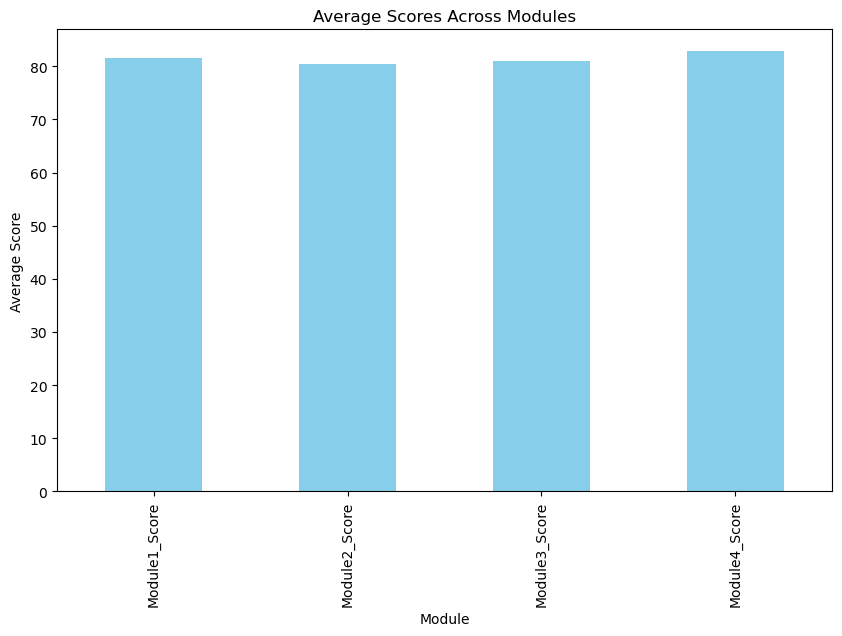

In [6]:
plt.figure(figsize=(10, 6))
df.mean()[1:].plot(kind='bar', color='skyblue')
plt.title('Average Scores Across Modules')
plt.xlabel('Module')
plt.ylabel('Average Score')
plt.show()

<Figure size 1000x600 with 0 Axes>

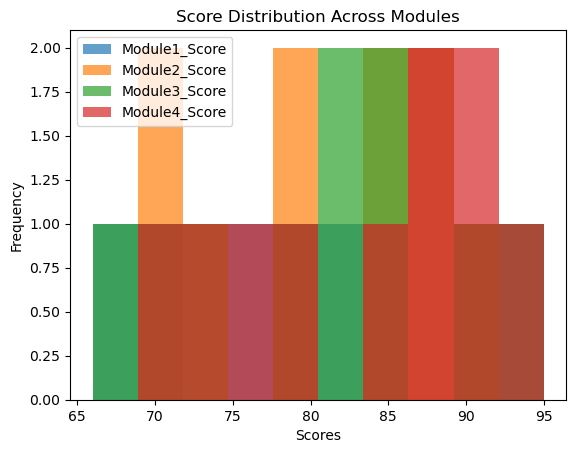

In [19]:
plt.figure(figsize=(10, 6))
df[['Module1_Score', 'Module2_Score', 'Module3_Score', 'Module4_Score']].plot.hist(alpha=0.7)
plt.title('Score Distribution Across Modules')
plt.xlabel('Scores')
plt.show()

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Between Modules')
plt.show()

ValueError: could not convert string to float: 'January'

<Figure size 800x600 with 0 Axes>

In [9]:
print("\nCorrelation Insights:")
print("If correlation is high between certain modules, students perform similarly in them. Otherwise, focus on improving weak modules.")



Correlation Insights:
If correlation is high between certain modules, students perform similarly in them. Otherwise, focus on improving weak modules.


In [21]:
threshold = 70
low_performance = df[(df['Module1_Score'] < threshold) | (df['Module2_Score'] < threshold) | 
                     (df['Module3_Score'] < threshold) | (df['Module4_Score'] < threshold)]
print("\nLow-Performing Students (below 70 in any module):")
print(low_performance)


Low-Performing Students (below 70 in any module):
   Student_ID Enrollment_Month         School  Module1_Score  Module2_Score  \
2           3          January  High School A             66             72   
8           9            March  High School C             70             69   

   Module3_Score  Module4_Score  
2             70             75  
8             67             69  


TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

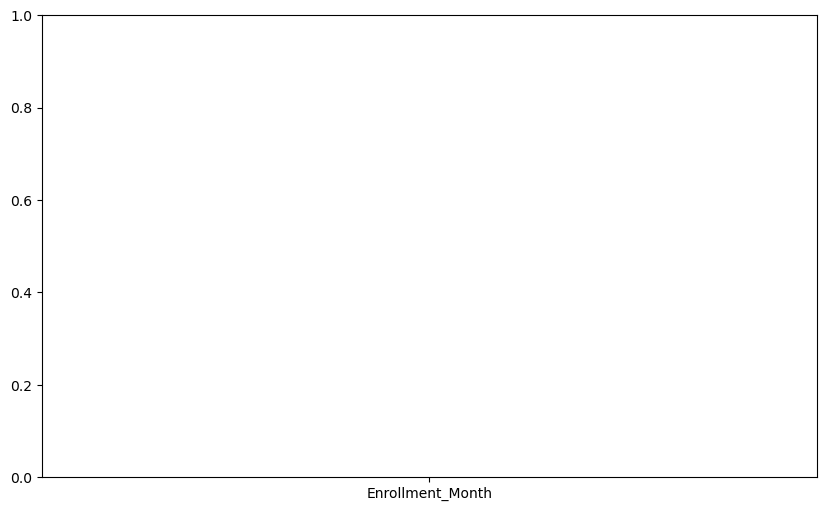

In [22]:
plt.figure(figsize=(10,6))
for i in range(len(df)):
    plt.plot(df.columns[1:], df.iloc[i, 1:], marker='o', label=f'Student {df.Student_ID[i]}')
plt.title('Student Performance Across Modules')
plt.xlabel('Modules')
plt.ylabel('Scores')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:
print("\nSuggestions for Improvement:")
if len(low_performance) > 0:
    print(f"Found {len(low_performance)} students who need improvement in at least one module.")
    print("Consider revising the curriculum or providing additional resources for Module 1 and 3 as they have the most variability.")
else:
    print("No major concerns. Student performance is generally good, but Module 3 seems to need att

SyntaxError: unterminated string literal (detected at line 6) (167790659.py, line 6)

In [25]:
print("\nSuggestions for Improvement:")
if len(low_performance) > 0:
    print(f"Found {len(low_performance)} students who need improvement in at least one module.")
    print("Consider revising the curriculum or providing additional resources for Module 1 and 3 as they have the most variability.")
else:
    print("No major concerns. Student performance is generally good, but Module 3 seems to need attention.")


Suggestions for Improvement:
Found 2 students who need improvement in at least one module.
Consider revising the curriculum or providing additional resources for Module 1 and 3 as they have the most variability.


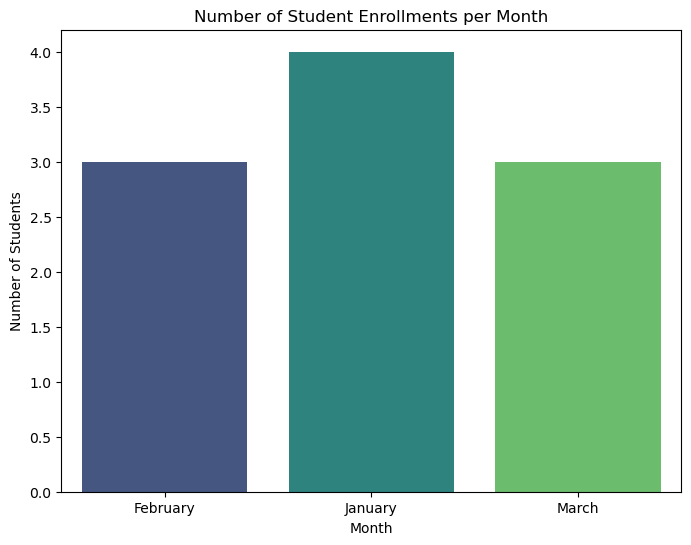


Enrollment Trends:
Enrollment_Month
February    3
January     4
March       3
Name: count, dtype: int64


In [26]:
plt.figure(figsize=(8,6))
enrollment_counts = df['Enrollment_Month'].value_counts().sort_index()
sns.barplot(x=enrollment_counts.index, y=enrollment_counts.values, palette='viridis')
plt.title('Number of Student Enrollments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Students')
plt.show()

# Insights from Enrollment Trends
print("\nEnrollment Trends:")
print(enrollment_counts)

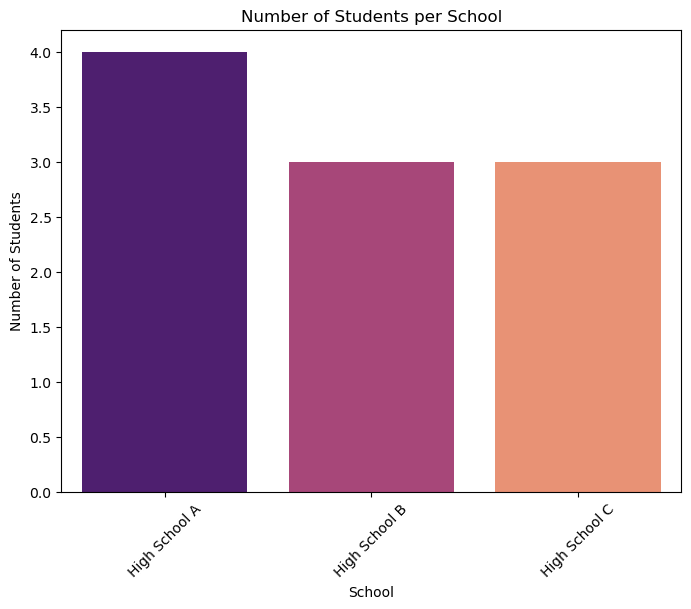


Student Distribution by School:
School
High School A    4
High School B    3
High School C    3
Name: count, dtype: int64


In [27]:
plt.figure(figsize=(8,6))
school_counts = df['School'].value_counts()
sns.barplot(x=school_counts.index, y=school_counts.values, palette='magma')
plt.title('Number of Students per School')
plt.xlabel('School')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# Insights from School Distribution
print("\nStudent Distribution by School:")
print(school_counts)

In [29]:
plt.figure(figsize=(10,6))
school_mean_scores = df.groupby('School').mean().iloc[:, 1:]
school_mean_scores.plot(kind='bar', figsize=(10,6))
plt.title('Average Module Scores by School')
plt.xlabel('School')
plt.ylabel('Average Scores')
plt.xticks(rotation=45)
plt.legend(title='Modules')
plt.show()



TypeError: Could not convert JanuaryJanuaryJanuaryJanuary to numeric

<Figure size 1000x600 with 0 Axes>

In [30]:
print("\nAverage Module Scores by School:")
print(school_mean_scores)


Average Module Scores by School:


NameError: name 'school_mean_scores' is not defined

In [31]:
print("\nConclusion:")
print("After analyzing the student performance and enrollment data, several insights emerged:")
print("- **Overall Performance**: Student performance across modules is satisfactory with some variability.")
print("- **Low-Performing Students**: A few students are struggling in specific modules, indicating areas for targeted support.")
print("- **Enrollment Trends**: Most students enrolled in January and February, suggesting peak enrollment periods.")
print("- **School Distribution**: High School A sends the most students, followed by High School B and C.")
print("- **Performance by School**: Students from different schools show varying average scores, which could reflect differences in prior preparation or teaching quality.")
print("Recommendations include focusing on modules where students underperform, understanding enrollment patterns to better allocate resources, and collaborating with schools to enhance student preparedness.")


Conclusion:
After analyzing the student performance and enrollment data, several insights emerged:
- **Overall Performance**: Student performance across modules is satisfactory with some variability.
- **Low-Performing Students**: A few students are struggling in specific modules, indicating areas for targeted support.
- **Enrollment Trends**: Most students enrolled in January and February, suggesting peak enrollment periods.
- **School Distribution**: High School A sends the most students, followed by High School B and C.
- **Performance by School**: Students from different schools show varying average scores, which could reflect differences in prior preparation or teaching quality.
Recommendations include focusing on modules where students underperform, understanding enrollment patterns to better allocate resources, and collaborating with schools to enhance student preparedness.
